In [141]:
#pip install cvxpy[GLPK,SCIP]

In [142]:
from cvxpy import *

print(installed_solvers())

['CLARABEL', 'CPLEX', 'ECOS', 'ECOS_BB', 'GUROBI', 'MOSEK', 'OSQP', 'SCIP', 'SCIPY', 'SCS']


# **Aircraft Trajectory Planning With Collision Avoidance Using Mixed Integer Linear Programming**


[Richards, A., & How, J. P. (2002). Aircraft trajectory planning with collision avoidance using mixed integer linear programming. Proceedings of the American Control Conference](https://doi.org/10.1109/ACC.2002.1023918)


- Other references from the same main author:

[Richards, A. G. (2002). Trajectory Optimization using Mixed-Integer Linear Programming. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](https://www.mit.edu/people/jhow/Richards_SM.pdf)

[Richards, A., & How, J. (2005). Mixed-integer programming for control. Proceedings of the American Control Conference, 2676–2683](https://doi.org/10.1109/ACC.2005.1470372)


- Additional refereces of various authors:

[Schouwenaars, T., De Moor, B., Feron, E., & How, J. (2001). Mixed integer programming for multi-vehicle path planning. Proceedings of the European Control Conference](https://doi.org/10.239195/ecc.2001.7076321)

[Schouwenaars, T., How, J., & Feron, E. (2004). Receding horizon path planning with implicit safety guarantees. Proceedings of the European Control Conference](https://doi.org/10.23919/acc.2004.1384742)

[Schouwenaars, T. (2006). Safe Trajectory Planning of Autonomous Vehicles. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](http://hdl.handle.net/1721.1/35298)

[Culligan, K. F. (2006). Online trajectory planning for uavs using mixed integer linear programming. MASSACHUSETTS INSTITUTE OF TECHNOLOGY](http://dspace.mit.edu/handle/1721.1/37952)

[Liying Yang, Juntong Qi, & Jianda Han. (2012). Path planning methods for mobile robots with linear programming. Proceedings of the International Conference on Modelling, Identification and Control](https://ieeexplore.ieee.org/document/6260329)

## **Plotting**

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 8})


def plot(T=None, C=None, F=None, S=None, s0=None, sf=None, style='-r'):
    '''
    S : 2-dimensional array (4, n)

    S[0,:] --> x
    S[1,:] --> xdot
    S[2,:] --> y
    S[3,:] --> ydot
    '''
    fig = plt.figure(figsize=(5, 6));
    ax = fig.subplots(3, 1, height_ratios=[3,1,1]);

    if S is not None and T is not None:
        V = np.sqrt(S[1,:]**2 + S[3,:]**2)
        F = np.sqrt(F[0,:]**2 + F[1,:]**2)

        ax[0].plot(S[0,:], S[2,:], style);
        ax[1].plot(T, V, '-r');
        ax[2].plot(T[0:-1], F, '-r');
    
    if s0 is not None:
        ax[0].plot(s0[0], s0[2], 'ob', markersize=10);

    if sf is not None:
        sf = np.reshape(sf,(-1,4))
        ax[0].plot(sf[:,0], sf[:,2], 'dg', markersize=8);

    if C is not None:
        RECTS = []
        for k in range(len(C)):
            RECTS.append(patches.Rectangle((C[k,0], C[k,2]),
                                        np.abs(C[k,0]-C[k,1]),
                                        np.abs(C[k,2]-C[k,3]),
                                        linewidth=1, edgecolor='k', facecolor='k')
        )

        for k in range(len(RECTS)):
            ax[0].add_patch(RECTS[k])

    ax[0].set_aspect('equal');
    ax[0].axis('equal');
    ax[0].set_xlabel('$x$');
    ax[0].set_ylabel('$y$');

    ax[1].set_xlabel('Time (s)');
    ax[1].set_ylabel('$|v|$');

    ax[2].set_xlabel('Time (s)');
    ax[2].set_ylabel('$|f|$');

    plt.tight_layout()
    

def plot_states(T, S):
    '''
    T : 1-dimensional time array (n, )
    S : 2-dimensional array (4, n)

    S[0,:] --> x
    S[1,:] --> xdot
    S[2,:] --> y
    S[3,:] --> ydot
    '''
    fig = plt.figure();
    ax = fig.subplots(2, 2);

    ax[0,0].plot(T, S[0,:], '-r');
    ax[0,0].grid();
    ax[0,0].set_xlabel('Time (s)');
    ax[0,0].set_ylabel('$x$');

    ax[0,1].plot(T, S[2,:], '-r');
    ax[0,1].grid();
    ax[0,1].set_xlabel('Time');
    ax[0,1].set_ylabel('$y$');

    ax[1,0].plot(T, S[1,:], '-r');
    ax[1,0].grid();
    ax[1,0].set_xlabel('Time (s)');
    ax[1,0].set_ylabel('$v_x$');

    ax[1,1].plot(T, S[3,:], '-r');
    ax[1,1].grid();
    ax[1,1].set_xlabel('Time (s)');
    ax[1,1].set_ylabel('$v_y$');

    plt.tight_layout()


def plot_inputs(T, F):
    '''
    T : 1-dimensional time array (n, )
    F : 2-dimensional array (2, n)

    F[0,:] --> fx
    F[1,:] --> fy
    '''
    fig = plt.figure();
    ax = fig.subplots(1, 2);

    ax[0].plot(T, F[0,:], '-r');
    ax[0].grid();
    ax[0].set_xlabel('Time (s)');
    ax[0].set_ylabel('$fx$');

    ax[1].plot(T, F[1,:], '-r');
    ax[1].grid();
    ax[1].set_xlabel('Time (s)');
    ax[1].set_ylabel('$fy$');

    plt.tight_layout()
    

def plot_turn_rate(T, S, F, m):
    w = np.zeros(len(T))
    v = S[1::2, :]
    for k in range(len(T)):
        w[k] = np.rad2deg(np.linalg.norm(F[:,k]) / (m * np.linalg.norm(v[:,k])))

    fig = plt.figure();
    ax = fig.subplots();
    ax.plot(T, w)
    ax.grid();
    ax.set_xlabel('Time (s)');
    ax.set_ylabel('Turn rate (deg/s)');

    plt.tight_layout()

## **Test environments**

In [144]:
import numpy as np

%matplotlib inline


'''
Given an following array: (xmin, xmax, ymin, ymax)
This corresponds to a rectangle  with:
  lower-left corner located at (xmin, ymin)
  width = abs(xmax - xmin)
  height = abs(ymax - ymin)
'''

def create_env1():
    # Figure 4
    C = np.array([[-4,-3, 3.5, 6],
                  [ 2, 3,   3, 9],
                  [ 0, 1,   1, 5]], dtype=np.float32)
    return C

def create_env2():
    # Figure 9
    C = np.array([[1, 3, 0, 8]], dtype=np.float32)
    return C

## **System model**

The vehicle is modeled as a simple 2-D discrete double integrator.


$$
\begin{bmatrix}
x_{i+1}\\
v_{x_{i+1}}\\
y_{i+1}\\
v_{y}{}_{_{i+1}}
\end{bmatrix} =\begin{bmatrix}
1 & \Delta t & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & \Delta t\\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
x_{i}\\
v_{x_{i}}\\
y_{i}\\
v_{y_{i}}
\end{bmatrix} +\frac{1}{m}\begin{bmatrix}
0.5\Delta t^{2} & 0\\
\Delta t & 0\\
0 & 0.5\Delta t^{2}\\
0 & \Delta t
\end{bmatrix}\begin{bmatrix}
f_{x}\\
f_{y}
\end{bmatrix}
$$

In [145]:
import numpy as np

def generate_model(dt, mass):
    A = np.array([[1.,   dt,  0., 0. ], # x
                [0.,   1,   0., 0. ],    # xdot
                [0.,   0.,  1., dt ],    # y
                [0.,   0.,  0., 1, ]])   # ydot
    B = 1.0 / mass * np.array([[0.5*dt**2, 0.        ],
                                [dt,        0.        ],
                                [0.,        0.5*dt**2 ],
                                [0.,        dt        ]])
    return A, B

The parameters are mentioned in Section 4 of the paper.

$$
\begin{equation}
\begin{aligned}
m &= 5 \, \text{kg}\\
\Delta t &=  2 \, \text{s}\\
T &= 60 \text{s}\\
v_{\text{max}} &= 0.225 \, \text{m/s}\\
\epsilon_f &= 0.001\\ 
\epsilon_v &= 0.01 
\end{aligned}
\end{equation}
$$

Note that $\epsilon_v$ is our additional parameter.

## **Planning**

Constraint programming:

- Dynamic constraints (Section 2.2)
- Collision avoidance (Section 2.3)
- Minimum time trajectory (Section 2.4)
- Multiple waypoints (Section 2.5)


We expand the minimum time equation that is expressed in eq. (9) to also include velocity (for single vehicle).

$$
\begin{equation}
\begin{aligned}
& \forall i \in[1 \ldots T] \\
& x_{\mathrm{ip}}-x_{\mathrm{F}} \leq R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& x_{\mathrm{i}}-x_{\mathrm{F}} \geq-R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& y_{\mathrm{i}}-y_{\mathrm{F}} \leq R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& y_{\mathrm{i}}-y_{\mathrm{F}} \geq -R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& v_{x_\mathrm{i}}-v_{x_{\mathrm{F}}} \leq R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& v_{x_\mathrm{i}}-v_{x_{\mathrm{F}}} \geq-R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& v_{y_\mathrm{i}}-v_{y_{\mathrm{F}}} \leq R\left(1-b_{\mathrm{i}}\right) \\
\text { and }& v_{y_\mathrm{i}}-v_{y_{\mathrm{F}}} \geq -R\left(1-b_{\mathrm{i}}\right) \\
\\
&\sum_{i=1}^T b_{\mathrm{i}}=1
\end{aligned}
\end{equation}
$$

Additionally, to have minimum distance (at least to try to have one), we also include the sum of the velocities as part of the objective function.
$$
\min_{s,f,b,c} J=\sum _{i=1}^{T} T_{i} b_{i} +\epsilon _{f}\sum _{i=0}^{T-1}(| f_{x_{i}}| +| f_{y_{i}}| ) +\epsilon _{v}\sum _{i=0}^{T-1}(| v_{x_{i}}| +| v_{y_{i}}| )
$$

The "tight turns around obstacle corners" that can be seen in Fig. 4 of the paper was actually the shortest distance from source to the destination. Due to constrained turning rate, minimum time does not always mean minimum distance. Therefore, we must trigger this minimum distance (if the turning rate allows it) by introducing the sum-of-the-velocity-over-time as part of the objective function.

In [146]:
from cvxpy import *


def plan(N, s0, sf, C=None, wmax=np.deg2rad(15.0), mass=5.0, vmax=0.225, dt=2.0, solver="MOSEK"):
    Ap, Bp = generate_model(dt, mass)
    [ns, nf] = Bp.shape
    
    M = 10 # number of the polygon sides
    vmax = vmax * np.cos(np.pi/M) # correction factor as explained in Culligan thesis, p.31, eq. (2.12)
    fmax = wmax * mass * vmax  # See eq. (2)

    # Define problem
    f = Variable((nf, N)) # input variables
    s = Variable((ns, N+1)) # state variables, make S[N] as the terminal state

    # R is a positive number that is much larger than any position or velocity
    # to be encountered in the problem
    R = 20.0

    # Constraints for the intial states
    constraints  = [s[:,0] == s0]  # eq. (4)

    # System dynamics constraints
    for k in range(N):
        constraints += [s[:,k+1] == Ap@s[:,k] + Bp@f[:,k]]  # eq. (3)

    # Velocity-force dynamic constraints, polytopic circle
    for k in range(N):
        for m in range(1,M+1):
            constraints += [(f[0,k]*np.sin(2*np.pi*m/M) + f[1,k]*np.cos(2*np.pi*m/M)) <= fmax]  # eq. (6)

    for k in range(1,N+1):
        for m in range(1,M+1):
            constraints += [(s[1,k]*np.sin(2*np.pi*m/M) + s[3,k]*np.cos(2*np.pi*m/M)) <= vmax]  # eq. (7)

    # Collision avoidance
    if C is not None:
        C = np.reshape(C, (-1,4))
        L = len(C) # Number of the rectangular obstacles
        t1 = Variable((L, N+1), boolean=True)
        t2 = Variable((L, N+1), boolean=True)
        t3 = Variable((L, N+1), boolean=True)
        t4 = Variable((L, N+1), boolean=True)


        d = 0.0 # safety distance, 2 cm, not mentioned in the paper
        for k in range(1,N+1): # from 1 to N, exclude initials
            for l in range(L):  # eq. (8)
                constraints += [s[0,k]  <=  (C[l, 0] - d) + R*t1[l,k],
                                -s[0,k] <= -(C[l, 1] + d) + R*t2[l,k],
                                s[2,k]  <=  (C[l, 2] - d) + R*t3[l,k],
                                -s[2,k] <= -(C[l, 3] + d) + R*t4[l,k]]
                constraints += [t1[l,k] + t2[l,k] + t3[l,k] + t4[l,k] <= 3]

    # Minimum time constraints + waypoint constraints
    sf = sf.reshape(-1, 4)
    W = len(sf)
    c  = Variable((W, N+1), boolean=True)
    Tf = Variable(1) # Minimum finishing time

    for w in range(W):  # eq. (13)
        J_ = 0.0
        for k in range(1,N+1):
            # for positions
            constraints += [(s[0,k]-sf[w,0]) <=  R*(1-c[w,k]),
                        (s[0,k]-sf[w,0]) >= -R*(1-c[w,k]),
                        (s[2,k]-sf[w,2]) <=  R*(1-c[w,k]),
                        (s[2,k]-sf[w,2]) >= -R*(1-c[w,k])]

            # for velocities
            constraints += [(s[1,k]-sf[w,1]) <=  R*(1-c[w,k]),
                        (s[1,k]-sf[w,1]) >= -R*(1-c[w,k]),
                        (s[3,k]-sf[w,3]) <=  R*(1-c[w,k]),
                        (s[3,k]-sf[w,3]) >= -R*(1-c[w,k])]
            J_ += k*dt*c[w,k]

        constraints += [1 == sum(c[w, 1:])]  # eq. (14)
        constraints += [Tf >= J_]  # eq. (15)

    # The objective
    epsilonf = 0.001
    epsilonv = 0.01
    J = Tf + epsilonf*norm1(f[:,0:N]) + epsilonv*norm1(s[1::2,0:N]) # eq. (16)

    prob = Problem(Minimize(J), constraints)

    res = prob.solve(solver=solver, verbose=False, warm_start=True)
    print(res)

    return s.value, f.value, Tf.value

## **Point to point**

In [147]:
# Initial and final states, mentioned in Section 4.1
s0 = np.array([ 5., -0.2, 5., 0.])
sf = np.array([-5., -0.2,  4., 0.])

# Prediction horizon
tf = 60.0
dt = 2.0
N = np.int32(tf/dt)

C = create_env1()

### Maximum turn rate = 15 deg/s

$\omega_{\text{max}}=15 ^{\circ}/\text{s}$

Notice the "tight turns around obstacle corners". The generated minimum time trajectory is also the minimum distance trajectory.

In [148]:
s, f, Tf = plan(C=C, N=N, s0=s0, sf=sf, wmax=np.deg2rad(15.0), dt=dt, solver="MOSEK")

58.087745337571256


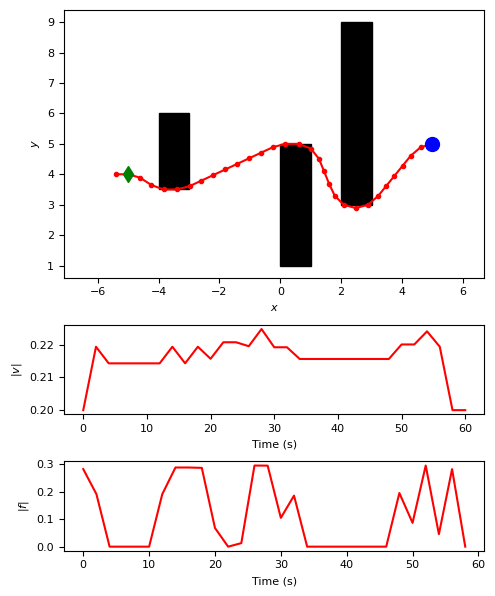

In [149]:
%matplotlib inline

time_span = np.linspace(0, tf, N+1)
plot(T=time_span, C=C, F=f, S=s, s0=s0, sf=sf, style='.-r')

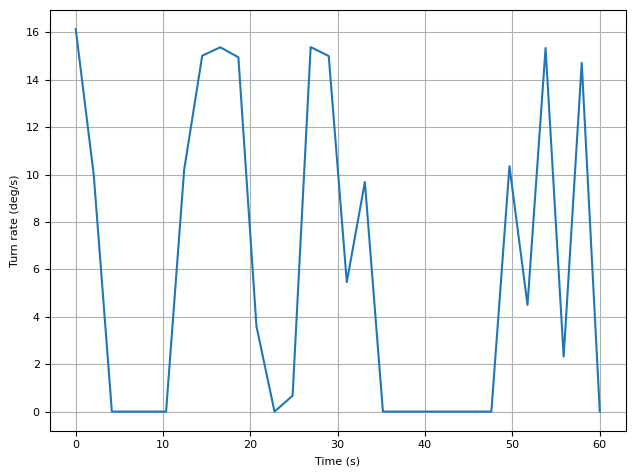

In [150]:
%matplotlib inline

time_span = np.linspace(0, tf, N)
plot_turn_rate(T=time_span, S=s, F=f, m=5.0)

### Maximum turn rate = 12 deg/s

$\omega_{\text{max}}=12 ^{\circ}/\text{s}$


Notice that the tight turns dissapear. The generated minimum time trajectory does not have the minimum distance.

In [151]:
s, f, Tf = plan(C=C, N=N, s0=s0, sf=sf, wmax=np.deg2rad(12.0), solver="MOSEK")

58.08908427597392


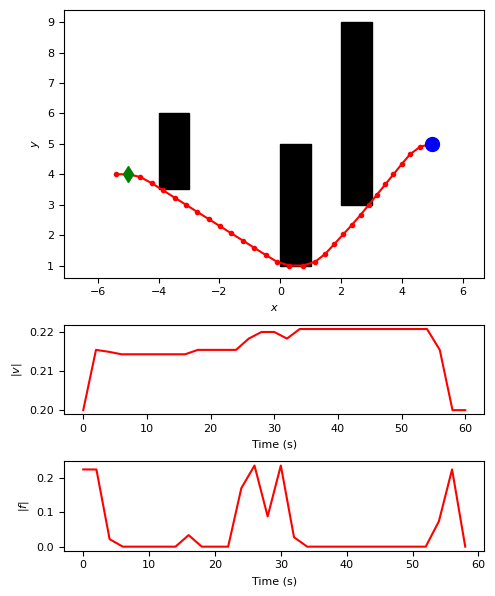

In [152]:
%matplotlib inline

time_span = np.linspace(0, tf, N+1)
plot(T=time_span, C=C, F=f, S=s, s0=s0, sf=sf, style='.-r')

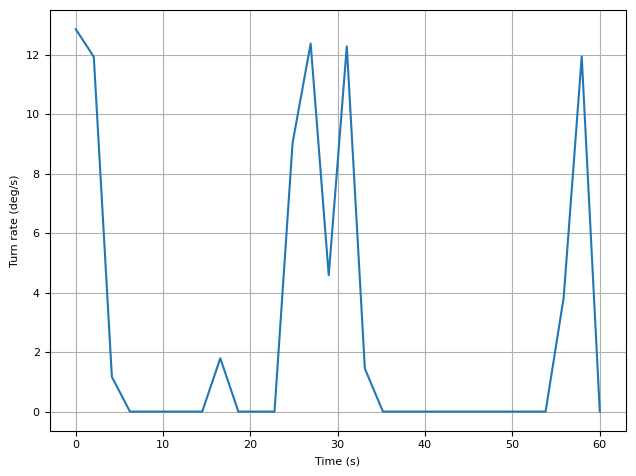

In [153]:
%matplotlib inline

time_span = np.linspace(0, tf, N)
plot_turn_rate(T=time_span, S=s, F=f, m=5.0)

## Multiple waypoints

Similar to minimim time trajector, the waypoints also include the velocities. 

Assume that there are $W$ waypoints and the position of the $k^{\text {th }}$ waypoint is $\left(x_{\mathrm{W}\mathrm{k}}, y_{\mathrm{W}\mathrm{k}}, v_{x_{\mathrm{W}\mathrm{k}}}, v_{y_{\mathrm{W}\mathrm{k}}}\right)$. 

### Experiment 1

In [154]:
                                                                                                                                                                                                            # Based on Fig. 8
# Initial and final states
s0 = np.array([-7., 0., 5., 0.])

# Prediction horizon
tf = 120.0
N = np.int32(tf/dt)

# Format: [x, y, vx, vy]
sf = np.array([[-2, 0, 6, 0,],
            [6, 0, 4, 0],
            [7, 0, 8, 0]], dtype=np.float32)

s, f, Tf = plan(N=N, s0=s0, sf=sf, wmax=np.deg2rad(5.0), solver="MOSEK")

118.10852450101535


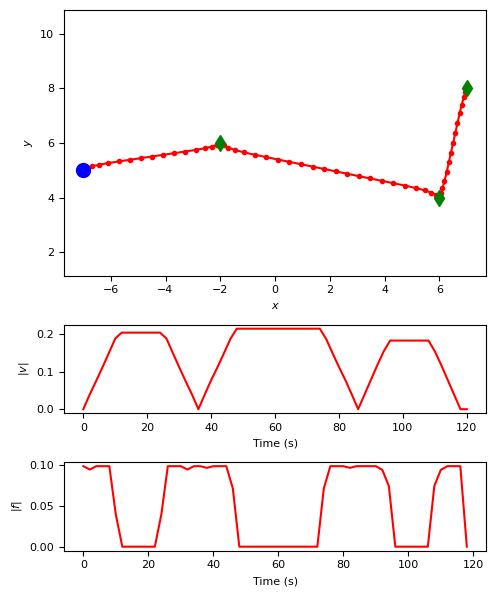

In [155]:
%matplotlib inline 

time_span = np.linspace(0, tf, N+1)
plot(T=time_span, F=f, S=s, s0=s0, sf=sf, style='.-r')


### Experiment 2

In [156]:
                                                                                                                                                                                                            # Based on Fig. 8
# Initial and final states
s0 = np.array([-7., 0., 5., 0.])

# Prediction horizon
tf = 130.0
N = np.int32(tf/dt)

sf = np.array([[-2, 0, 6, 0,],
            [6, 0, 4, 0],
            [7, 0, 8, 0]], dtype=np.float32)

C = create_env2()

s, f, Tf = plan(C=C, N=N, s0=s0, sf=sf, wmax=np.deg2rad(5.0), solver="MOSEK")

124.11393243706794


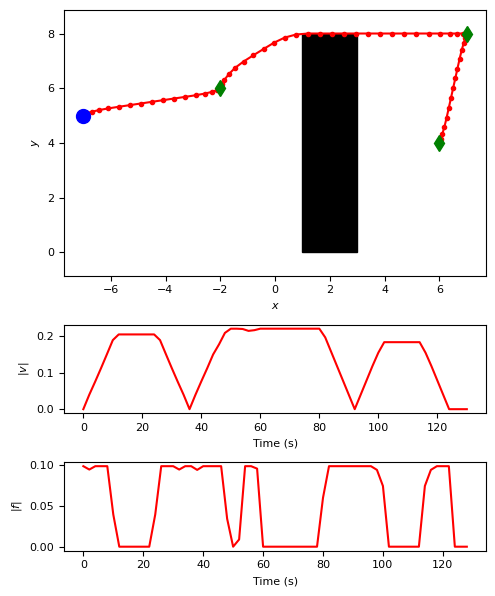

In [157]:
%matplotlib inline 

time_span = np.linspace(0, tf, N+1)
plot(T=time_span, C=C, F=f, S=s, s0=s0, sf=sf, style='.-r')
